In [184]:
!pip install voila

  Using cached nbconvert-5.6.1-py2.py3-none-any.whl (455 kB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.3.1
    Uninstalling Pygments-2.3.1:
      Successfully uninstalled Pygments-2.3.1
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.4.0
    Uninstalling nbconvert-5.4.0:
      Successfully uninstalled nbconvert-5.4.0
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.2.4
    Uninstalling jupyter-client-5.2.4:
      Successfully uninstalled jupyter-client-5.2.4


ERROR: spyder 3.3.2 has requirement pyqt5<5.10; python_version >= "3", but you'll have pyqt5 5.13.0 which is incompatible.
ERROR: jupyter-client 6.1.6 has requirement jupyter-core>=4.6.0, but you'll have jupyter-core 4.4.0 which is incompatible.


In [1]:
import pandas as pd

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from collections import Counter
from PIL import Image, ImageDraw, ImageFont

In [11]:
from nltk.util import ngrams 

In [2]:
df = pd.read_csv('version1407.csv',encoding='utf-8')

In [6]:
df.head()

,submission_date,genero,edad,donde_vivis,opinion_cuarentena,home_office,act_original,opinion_circulacion,circulacion_abierta,submitter,filepath,act_limpia,circ_limpia,Profesion
0,28/06/2020,Hombre,Entre 56 y 65 años,provincia de buenos aires,La cuarentena sigue siendo muy necesaria,No trabajo ni estudio,NaN,Estoy muy en desacuerdo con que se pueda volve...,NaN,NaN,1980d430-bfc4-11ea-9f59-9197db17f01d.csv,NaN,NaN,NaN
1,28/06/2020,Hombre,Más de 66 años,rio negro,La cuarentena ya no es nada necesaria,No trabajo ni estudio,jubilado,Estoy muy de acuerdo con que se pueda volver a...,NaN,NaN,1980d430-bfc4-11ea-9f59-9197db17f01d.csv,jubilado,NaN,jubilado
2,28/06/2020,Hombre,Más de 66 años,provincia de buenos aires,La cuarentena ya no es tan necesaria,No trabajo ni estudio,NaN,Estoy algo en desacuerdo con que se pueda volv...,esta bien,NaN,1980d430-bfc4-11ea-9f59-9197db17f01d.csv,NaN,"['esta', 'bien']",NaN
3,28/06/2020,Hombre,Más de 66 años,provincia de buenos aires,La cuarentena sigue siendo algo necesaria,"Si, pude hacerlo online",bailo folclore,Estoy algo en desacuerdo con que se pueda volv...,debe ser estrictamente controlada,NaN,1980d430-bfc4-11ea-9f59-9197db17f01d.csv,"['bailo', 'folclore']","['debe', 'ser', 'estrictamente', 'controlada']",bailarin
4,28/06/2020,Hombre,Entre 56 y 65 años,ciudad autonoma de buenos aires,La cuarentena sigue siendo muy necesaria,"Si, pude hacerlo online",NaN,Estoy algo de acuerdo con que se pueda volver ...,NaN,NaN,1980d430-bfc4-11ea-9f59-9197db17f01d.csv,NaN,NaN,NaN


In [8]:
opinion_circulacion = df.loc[df.circulacion_abierta.notnull(),'circulacion_abierta']

In [12]:
def limpiar(x):
    x=x.lower()
    x=x.replace('\n','')
    x=x.replace('á','a')
    x=x.replace('é','e')
    x=x.replace('í','i')
    x=x.replace('ó','o')
    x=x.replace('ú','u')
    x = x.strip(' ')
    x = ' '.join(x.split('\\n'))
    x = ' '.join(x.split('\n'))
    for signo in list(string.punctuation):
        x = ' '.join(x.split(signo))
    x = x.replace('  ',' ')
    return x

In [14]:
opinion_circulacion=pd.DataFrame(opinion_circulacion)

In [17]:
opinion_circulacion['Limpia'] = [limpiar(x) for x in opinion_circulacion.circulacion_abierta]

In [19]:
stop=stopwords.words('spanish')

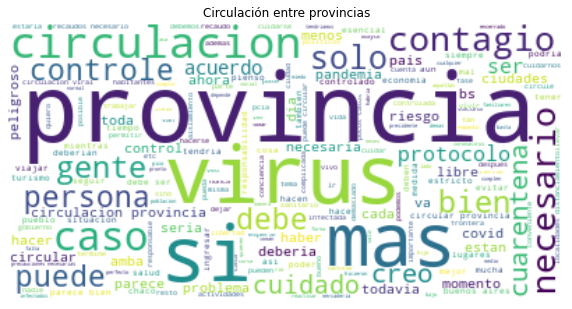

In [23]:
values = ','.join(str(v) for v in opinion_circulacion['Limpia'])
word_tokens = word_tokenize(values)
word_tokens = [w.strip(' ') for w in word_tokens]
filtered_sentence = [w for w in word_tokens if not w in stop]
wc=WordCloud(background_color="white",collocations=True).generate(' '.join(filtered_sentence))
plt.imshow(wc, interpolation="bilinear")
#plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Circulación entre provincias')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [181]:
filtered_sentence = [w for w in filtered_sentence if not w in list(string.punctuation)] 
counts = Counter(filtered_sentence)
doble_counts = Counter(ngrams(filtered_sentence,2))
triple_counts = Counter(ngrams(filtered_sentence,3))
print('De a una')
for o in range(len(counts.most_common(10))):
    print("La palabra " +str(counts.most_common(10)[o][0])+" aparece "+str(counts.most_common(10)[o][1])+" veces")
print('--------------------')
print('De a dos')
for i in range(len(doble_counts.most_common(10))):
    print("Las palabras " +str(' '.join(list(doble_counts.most_common(10)[i][0])))+" aparecen "+str(doble_counts.most_common(10)[i][1])+" veces")
print('--------------------')
print('De a tres')
for a in range(len(triple_counts.most_common(10))):
    print("Las palabras " +str(' '.join(list(triple_counts.most_common(10)[a][0])))+" aparecen "+str(triple_counts.most_common(10)[a][1])+" veces")
print('--------------------')

De a una
La palabra provincias aparece 148 veces
La palabra circulacion aparece 125 veces
La palabra virus aparece 112 veces
La palabra si aparece 106 veces
La palabra mas aparece 95 veces
La palabra casos aparece 69 veces
La palabra bien aparece 57 veces
La palabra debe aparece 52 veces
La palabra provincia aparece 52 veces
La palabra q aparece 52 veces
--------------------
De a dos
Las palabras circulacion provincias aparecen 26 veces
Las palabras bs as aparecen 15 veces
Las palabras parece bien aparecen 14 veces
Las palabras buenos aires aparecen 14 veces
Las palabras covid 19 aparecen 14 veces
Las palabras debe ser aparecen 13 veces
Las palabras circulacion virus aparecen 13 veces
Las palabras circular provincias aparecen 12 veces
Las palabras circulacion viral aparecen 10 veces
Las palabras solo provincias aparecen 9 veces
--------------------
De a tres
Las palabras tomando recaudos necesarios aparecen 4 veces
Las palabras gente necesita trabajar aparecen 4 veces
Las palabras prov

### Summarization

In [35]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import es_core_news_sm
from sklearn.feature_extraction.text import CountVectorizer

In [180]:
texto='.fin_oracion '.join(opinion_circulacion.circulacion_abierta)
doc = nlp(texto)
texto_split=texto.split('.fin_oracion ')
texto_split=[x.lower() for x in texto_split]
cv = CountVectorizer(stop_words=list(STOP_WORDS))   
cv_fit=cv.fit_transform(texto_split)    
word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0)
word_frequency = dict(zip(word_list,count_list))
val=sorted(word_frequency.values())
higher_word_frequencies = [word for word,freq in word_frequency.items() if freq in val[-5:]]
print("Las palabras más frecuentes son " + ', '.join(higher_word_frequencies[:-1])+' y '+higher_word_frequencies[-1])
# gets relative frequencies of words
higher_frequency = val[-1]
for words in word_frequency.keys():  
    word_frequency[words] = (word_frequency[words]/higher_frequency)
sentence_rank={}
for sent in texto_split:
    for word in sent.split() :       
        if word in word_frequency.keys():            
            if sent in sentence_rank.keys():
                sentence_rank[sent]+=word_frequency[word]
            else:
                sentence_rank[sent]=word_frequency[word]
top_sentences=(sorted(sentence_rank.values())[::-1])
top_sent=top_sentences[:30]
summary=[]
strength_lista = []
for sentence,strength in sentence_rank.items():  
    if strength in top_sent:
        summary.append(sentence)
        strength_lista.append(strength)
    else:
        continue
df_sent=pd.DataFrame(list(zip(summary,strength_lista)),columns=['Sentence','Score'])
df_sent=df_sent.sort_values(by=['Score'],ascending=False).reset_index()
numero=0
print('\n')
print('Algunas respuestas representativas son: ')
print('\n')
for i in range(len(df_sent)):
    if numero<3:    
        if (len(df_sent.Sentence[i])>30)&(len(df_sent.Sentence[i])<1000):
            print('- '+df_sent.Sentence[i])
            numero+=1
            print('\n')
    else:
        break


Las palabras más frecuentes son casos, circulacion, provincia, provincias y virus


Algunas respuestas representativas son: 


- creo que despues de 100 dias de cuarentena, ya deberia estar habilitada la circulacion en micros de larga distancia asi como en auto, sobre todo entre provincias que ya alcanzaron la fase 5, o entre ciudades o localidades tambien en fase 5.  solo no estaria de acuerdo en el contacto de provincias de fase 5 con otras que estan en una fase inferior. no me parece justo que en donde hicimos las cosas bien debamos seguir esperando que habran las provincias o que habiliten los micros de larga distancia por culpa de una sola provincia que hicieron todo mal.


- deberia tomarse en cuenta que si hay localidades limitrofes donde no hay circulacion del virus y que sean de provincias distintas, tranquilamente podrian circular las personas en esas localidades y a tambien ir a las ciudades capitales donde el virus este manejado


- me encantaria viajar a la patagonia donde

### LDA

In [49]:
def palabras_clave(x):
    doc = nlp(x)
    palabras = [(token.pos_,token.text) for token in doc]
    #print(palabras)
    palabras_utiles = [x[1] for x in palabras if x[0] in ['ADJ','NOUN','NUM','VERB','PRON','PROPN','PART']]
    return ' '.join(palabras_utiles)

In [50]:
def lemas_verbo(x):
    doc = nlp(x)
    palabras = [(token.pos_,token.lemma_,token.text) for token in doc]
    palabras_lema = [x[1] if x[0] == 'VERB' else x[2] for x in palabras]# if x[0] in ['ADJ','NOUN','NUM','PRON','PROPN','VERB','PART']]
    return ' '.join(palabras_lema)

In [93]:
#df['Limpia 2'] = df.Limpia.apply(lambda x: palabras_clave(x))

In [68]:
opinion_circulacion['Limpia 2'] = opinion_circulacion['circulacion_abierta'].apply(lambda x: palabras_clave(x))

In [69]:
opinion_circulacion['Limpia 2'] = opinion_circulacion['Limpia 2'].apply(lambda x: lemas_verbo(x))

In [71]:
from gensim.models.ldamodel import LdaModel

In [72]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(opinion_circulacion['Limpia 2']))

#print(data_words[:1])

In [123]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])

In [124]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [125]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])

#print(data_words_bigrams[2])

In [126]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
#print(corpus[:5])

In [79]:
for i in range(3,12):    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha=0.5,
                                               per_word_topics=True)
    df_palabras_topico =pd.DataFrame()
    for topico in lda_model.print_topics(num_words=6):
        #print(i[1])
        #print(i[1].split(' + '))
        palabras_topico=topico[1].split(' + ')
        array_palabras=[x.split('*')[1] for x in palabras_topico]
        df_palabras_topico['Topico '+str(topico[0])]=array_palabras
    doc_lda = lda_model[corpus]
    print('Topicos '+str(topico[0]+1))
    display(df_palabras_topico)

Topicos 3


,Topico 0,Topico 1,Topico 2
0,"""se""","""que""","""se"""
1,"""controles""","""hacer""","""provincias"""
2,"""necesario""","""provincia""","""virus"""
3,"""tomar""","""todo""","""circulacion"""
4,"""necesarios""","""nos""","""tener"""
5,"""que""","""cuarentena""","""casos"""


Topicos 4


,Topico 0,Topico 1,Topico 2,Topico 3
0,"""se""","""que""","""se""","""que"""
1,"""controles""","""hacer""","""provincias""","""tener"""
2,"""necesario""","""gente""","""virus""","""covid"""
3,"""contagio""","""cuarentena""","""circulacion""","""protocolos"""
4,"""tomar""","""nos""","""casos""","""me"""
5,"""necesarios""","""riesgo""","""circular""","""control"""


Topicos 5


,Topico 0,Topico 1,Topico 2,Topico 3,Topico 4
0,"""controles""","""se""","""provincias""","""tener""","""que"""
1,"""tomar""","""contagio""","""se""","""que""","""necesario"""
2,"""necesarios""","""cuarentena""","""circulacion""","""me""","""hacer"""
3,"""se""","""riesgo""","""virus""","""provincia""","""estan"""
4,"""ir""","""hacer""","""casos""","""covid""","""ver"""
5,"""recaudos""","""seria""","""circular""","""protocolos""","""llevar"""


Topicos 6


,Topico 0,Topico 1,Topico 2,Topico 3,Topico 4,Topico 5
0,"""controles""","""necesario""","""provincias""","""tener""","""que""","""se"""
1,"""tomar""","""contagio""","""circulacion""","""que""","""hacer""","""circular"""
2,"""necesarios""","""seria""","""virus""","""covid""","""se""","""que"""
3,"""ir""","""gente""","""se""","""protocolos""","""querer""","""me"""
4,"""recaudos""","""libre""","""casos""","""control""","""cuarentena""","""provincia"""
5,"""se""","""buenos_aires""","""mas""","""bien""","""estan""","""todo"""


Topicos 7


,Topico 0,Topico 1,Topico 2,Topico 3,Topico 4,Topico 5,Topico 6
0,"""controles""","""necesario""","""provincias""","""covid""","""que""","""circular""","""virus"""
1,"""tomar""","""contagio""","""circulacion""","""control""","""querer""","""me""","""se"""
2,"""necesarios""","""seria""","""se""","""que""","""hacer""","""que""","""todo"""
3,"""se""","""economia""","""casos""","""necesitar""","""estan""","""provincia""","""solo"""
4,"""ir""","""gente""","""tener""","""bien""","""ver""","""se""","""protocolos"""
5,"""acuerdo""","""libre""","""mas""","""cosas""","""llevar""","""deberia""","""donde"""


Topicos 8


,Topico 0,Topico 1,Topico 2,Topico 3,Topico 4,Topico 5,Topico 6,Topico 7
0,"""se""","""necesario""","""provincias""","""bien""","""que""","""me""","""solo""","""circular"""
1,"""controles""","""seria""","""circulacion""","""cosas""","""estan""","""que""","""todo""","""tener"""
2,"""tomar""","""se""","""se""","""bs_as""","""ver""","""deberia""","""donde""","""contagio"""
3,"""necesarios""","""economia""","""casos""","""caso""","""llevar""","""riesgo""","""virus""","""que"""
4,"""acuerdo""","""gente""","""virus""","""salta""","""esto""","""se""","""provincia""","""hacer"""
5,"""ir""","""libre""","""mas""","""chaco""","""gente""","""provincia""","""covid""","""cuarentena"""


Topicos 9


,Topico 0,Topico 1,Topico 2,Topico 3,Topico 4,Topico 5,Topico 6,Topico 7,Topico 8
0,"""se""","""necesario""","""provincias""","""control""","""que""","""me""","""todo""","""virus""","""tener"""
1,"""controles""","""seria""","""circulacion""","""bien""","""se""","""deberia""","""donde""","""circular""","""nos"""
2,"""tomar""","""se""","""casos""","""trabajar""","""querer""","""riesgo""","""covid""","""contagio""","""que"""
3,"""necesarios""","""gente""","""se""","""estricto""","""estan""","""se""","""protocolos""","""provincia""","""se"""
4,"""acuerdo""","""economia""","""tener""","""estar""","""llevar""","""pandemia""","""solo""","""hacer""","""pensar"""
5,"""ir""","""libre""","""mas""","""nop""","""esto""","""mas""","""virus""","""cuarentena""","""provincia"""


Topicos 10


,Topico 0,Topico 1,Topico 2,Topico 3,Topico 4,Topico 5,Topico 6,Topico 7,Topico 8,Topico 9
0,"""tomar""","""se""","""provincias""","""control""","""que""","""me""","""controles""","""virus""","""nos""","""que"""
1,"""necesarios""","""circulacion""","""tener""","""bien""","""necesario""","""personas""","""todo""","""se""","""pensar""","""contagio"""
2,"""acuerdo""","""seria""","""casos""","""estricto""","""querer""","""deberia""","""donde""","""circular""","""tener""","""hacer"""
3,"""gente""","""economia""","""circulacion""","""isieron""","""estan""","""salud""","""covid""","""mas""","""mas""","""se"""
4,"""ir""","""gente""","""solo""","""nop""","""llevar""","""circulacion""","""protocolos""","""provincias""","""tiempo""","""provincia"""
5,"""se""","""libre""","""contagios""","""perfecto""","""esto""","""provincia""","""ver""","""circulacion""","""todavia""","""momento"""


Topicos 11


,Topico 0,Topico 1,Topico 2,Topico 3,Topico 4,Topico 5,Topico 6,Topico 7,Topico 8,Topico 9,Topico 10
0,"""tomar""","""circulacion""","""tener""","""control""","""que""","""me""","""controles""","""se""","""nos""","""contagio""","""necesario"""
1,"""necesarios""","""provincias""","""casos""","""bien""","""querer""","""provincia""","""todo""","""virus""","""pensar""","""hacer""","""contagios"""
2,"""gente""","""mas""","""solo""","""estricto""","""estan""","""personas""","""donde""","""provincias""","""libertad""","""momento""","""pandemia"""
3,"""acuerdo""","""se""","""necesaria""","""isieron""","""llevar""","""tendria""","""covid""","""circular""","""tener""","""cuarentena""","""evitar"""
4,"""ir""","""seria""","""provincias""","""nop""","""peligroso""","""parece""","""protocolos""","""resto""","""tiempo""","""deberia""","""salud"""
5,"""recaudos""","""economia""","""una""","""necesidad""","""viajar""","""la""","""ver""","""responsabilidad""","""todavia""","""riesgo""","""buenos_aires"""


In [80]:
# Print the Keyword in the 10 topics
df_palabras_topico =pd.DataFrame()
for i in lda_model.print_topics(num_words=10):
    #print(i[1])
    #print(i[1].split(' + '))
    palabras_topico=i[1].split(' + ')
    array_palabras=[x.split('*')[1] for x in palabras_topico]
    df_palabras_topico['Topico '+str(i[0])]=array_palabras
doc_lda = lda_model[corpus]

In [81]:
df_palabras_topico

,Topico 0,Topico 1,Topico 2,Topico 3,Topico 4,Topico 5,Topico 6,Topico 7,Topico 8,Topico 9,Topico 10
0,"""tomar""","""circulacion""","""tener""","""control""","""que""","""me""","""controles""","""se""","""nos""","""contagio""","""necesario"""
1,"""necesarios""","""provincias""","""casos""","""bien""","""querer""","""provincia""","""todo""","""virus""","""pensar""","""hacer""","""contagios"""
2,"""gente""","""mas""","""solo""","""estricto""","""estan""","""personas""","""donde""","""provincias""","""libertad""","""momento""","""pandemia"""
3,"""acuerdo""","""se""","""necesaria""","""isieron""","""llevar""","""tendria""","""covid""","""circular""","""tener""","""cuarentena""","""evitar"""
4,"""ir""","""seria""","""provincias""","""nop""","""peligroso""","""parece""","""protocolos""","""resto""","""tiempo""","""deberia""","""salud"""
5,"""recaudos""","""economia""","""una""","""necesidad""","""viajar""","""la""","""ver""","""responsabilidad""","""todavia""","""riesgo""","""buenos_aires"""
6,"""trabajar""","""libre""","""seguir""","""perfecto""","""tambien""","""capital""","""aver""","""trasladar""","""cuidar""","""creer""","""cosas"""
7,"""necesitar""","""pais""","""situacion""","""falto""","""libres""","""esencial""","""excepcion""","""propagar""","""cuidarse""","""esto""","""estaria"""
8,"""cuidados""","""fronteras""","""peligro""","""peores""","""otro""","""volver""","""hacerse""","""final""","""turismo""","""se""","""fase"""
9,"""saber""","""afectadas""","""pocos""","""mudanza""","""familiares""","""recuperar""","""descargar""","""basta""","""nosotros""","""tener""","""cuidarnos"""


In [170]:
def palabras_topico_clave(x):
    topico = ' '.join([x for x in df_palabras_topico[x]])
    doc = nlp(topico)
    palabras = [(token.pos_,token.text) for token in doc]
    palabras_utiles = [x[1] for x in palabras if x[0] in ['NOUN','VERB','ADJ']]
    print( 'Las palabras más relevantes del '+str(x)+' son: '+', '.join(palabras_utiles[:-1])+' y '+palabras_utiles[-1])

In [176]:
for i in list(df_palabras_topico.columns):
    palabras_topico_clave(i)

Las palabras más relevante del Topico 0 son: tomar, necesarios, gente, acuerdo, ir, recaudos, trabajar, necesitar, cuidados y saber
Las palabras más relevante del Topico 1 son: provincias, seria, libre, pais, fronteras y afectadas
Las palabras más relevante del Topico 2 son: tener, casos, solo, necesaria, provincias, seguir y peligro
Las palabras más relevante del Topico 3 son: control, estricto, isieron, nop, necesidad, perfecto, falto, peores y mudanza
Las palabras más relevante del Topico 4 son: querer, estan, llevar, peligroso, viajar, tambien, libres y familiares
Las palabras más relevante del Topico 5 son: provincia, personas, tendria, capital, esencial, volver y recuperar
Las palabras más relevante del Topico 6 son: controles, covid, protocolos, ver, aver y descargar
Las palabras más relevante del Topico 7 son: virus, provincias, circular, resto, responsabilidad, trasladar, propagar, final y basta
Las palabras más relevante del Topico 8 son: pensar, libertad, tener, tiempo, toda

In [127]:
array_topico=[]
array_valor=[]
for i in corpus:
    dicc_topic = {}
    for x in lda_model.get_document_topics(i):
        dicc_topic[x[0]]=x[1]
    valor_maximo=0
    topico=np.nan
    for item in list(dicc_topic.items()):
        if item[1]>valor_maximo:
            valor_maximo=item[1]
            topico=item[0]
    #print(valor_maximo,topico)
    array_topico.append(topico)
    array_valor.append(valor_maximo)

In [83]:
opinion_circulacion['Topico']=array_topico
opinion_circulacion['Valor_topico']=array_valor

In [86]:
# Compute Perplexity
#print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
#print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.279049077888092

Coherence Score:  0.4364211315667706


### Sentiment

In [87]:
from textblob import TextBlob

In [88]:
file2 = open(r"negative_words_es.txt","r",encoding='utf-8')
file3 = open(r"positive_words_es.txt","r",encoding='utf-8')

In [89]:
file2=file2.readlines()
file3=file3.readlines()

In [90]:
neg_words=[x.strip('\n').lower() for x in file2]
pos_words=[x.strip('\n').lower() for x in file3]

In [98]:
def palabras_clave(x):
    doc = nlp(x)
    palabras = [(token.pos_,token.text) for token in doc]
    #print(palabras)
    palabras_utiles = [x[1] for x in palabras if x[0] in ['ADJ','NOUN','NUM','PRON','PROPN','VERB','PART']]
    return ' '.join(palabras_utiles)

In [99]:
def categoría(x):
    lista=[]
    if x<0.0:
        lista.append('Negativo')
    elif x==0.0:
        lista.append('Neutral')
    else:
        lista.append('Positivo')
    return lista[0]

In [100]:
opinion_circulacion['Limpio']=opinion_circulacion.circulacion_abierta.apply(lambda x:palabras_clave(x.lower()))

In [110]:
opinion_circulacion['Neg']=[sum([True for x in tweet.split() if x in neg_words]) for tweet in opinion_circulacion.circulacion_abierta]
opinion_circulacion['Pos']=[sum([True for x in tweet.split() if x in pos_words]) for tweet in opinion_circulacion.circulacion_abierta]

In [111]:
opinion_circulacion['Palabras']=[sum(True for x in tweet.split()) for tweet in opinion_circulacion.circulacion_abierta]
opinion_circulacion['Ratio']=(opinion_circulacion.Pos-opinion_circulacion.Neg)/opinion_circulacion.Palabras

In [112]:
opinion_circulacion['Categoría']=opinion_circulacion.Ratio.apply(lambda x: categoría(x))

In [113]:
opinion_circulacion.Categoría.value_counts()

Neutral     310
Negativo    307
Positivo    118
Name: Categoría, dtype: int64

In [155]:
print('Algunos ejemplos de respuestas negativas son: ')
for i in opinion_circulacion.sort_values(by='Ratio',ascending=True).iloc[:5,0]:
    print('- '+i)

Algunos ejemplos de respuestas negativas son: 
- negativo
- mal
- innecesario
- peligro contagio
- demasiado riesgoso para provincias sin contagios


In [156]:
print('Algunos ejemplos de respuestas positivas son: ')
for i in opinion_circulacion.sort_values(by='Ratio',ascending=False).iloc[:5,0]:
    print('- '+i)

Algunos ejemplos de respuestas positivas son: 
- positivo
- bien
- nada
- perfecto
- excelente


In [151]:
def sumarizacion(df,variable,variable_texto,i):
    print('Categoria: '+i)
    texto='.fin_oracion '.join(df.loc[df[variable]!=i,variable_texto])
    doc = nlp(texto)
    texto_split=texto.split('.fin_oracion ')
    texto_split=[x.lower() for x in texto_split]
    cv = CountVectorizer(stop_words=list(STOP_WORDS))   
    cv_fit=cv.fit_transform(texto_split)    
    word_list = cv.get_feature_names();    
    count_list = cv_fit.toarray().sum(axis=0)
    word_frequency = dict(zip(word_list,count_list))
    val=sorted(word_frequency.values())
    higher_word_frequencies = [word for word,freq in word_frequency.items() if freq in val[-5:]]
    print("Las palabras más frecuentes son " + ', '.join(higher_word_frequencies[:-1])+' y '+higher_word_frequencies[-1])
    # gets relative frequencies of words
    higher_frequency = val[-1]
    for words in word_frequency.keys():  
        word_frequency[words] = (word_frequency[words]/higher_frequency)
    sentence_rank={}
    for sent in texto_split:
        for word in sent.split() :       
            if word in word_frequency.keys():            
                if sent in sentence_rank.keys():
                    sentence_rank[sent]+=word_frequency[word]
                else:
                    sentence_rank[sent]=word_frequency[word]
    top_sentences=(sorted(sentence_rank.values())[::-1])
    top_sent=top_sentences[:20]
    summary=[]
    strength_lista = []
    for sentence,strength in sentence_rank.items():  
        if strength in top_sent:
            summary.append(sentence)
            strength_lista.append(strength)
        else:
            continue
    df_sent=pd.DataFrame(list(zip(summary,strength_lista)),columns=['Sentence','Score'])
    df_sent=df_sent.sort_values(by=['Score'],ascending=False).reset_index()
    numero=0
    for i in range(len(df_sent)):
        if numero<3:    
            if (len(df_sent.Sentence[i])>30)&(len(df_sent.Sentence[i])<1000):
                print('- '+df_sent.Sentence[i])
                numero+=1
                #print('-----')
        else:
            break
    print('\n')

In [152]:
for i in ['Positivo','Negativo']:  
    sumarizacion(opinion_circulacion,'Categoría','circulacion_abierta',i)

Categoria: Positivo
Las palabras más frecuentes son casos, circulacion, circular, provincias y virus
- creo que despues de 100 dias de cuarentena, ya deberia estar habilitada la circulacion en micros de larga distancia asi como en auto, sobre todo entre provincias que ya alcanzaron la fase 5, o entre ciudades o localidades tambien en fase 5.  solo no estaria de acuerdo en el contacto de provincias de fase 5 con otras que estan en una fase inferior. no me parece justo que en donde hicimos las cosas bien debamos seguir esperando que habran las provincias o que habiliten los micros de larga distancia por culpa de una sola provincia que hicieron todo mal.
- deberia tomarse en cuenta que si hay localidades limitrofes donde no hay circulacion del virus y que sean de provincias distintas, tranquilamente podrian circular las personas en esas localidades y a tambien ir a las ciudades capitales donde el virus este manejado
- me encantaria viajar a la patagonia donde vive uno de los hijos, pero s